In [18]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


### 1. Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib. 

<Figure size 432x288 with 0 Axes>

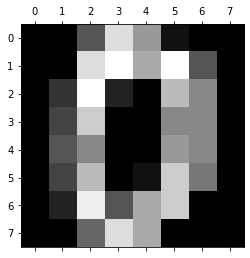

In [6]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

<Figure size 432x288 with 0 Axes>

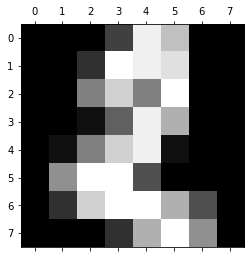

In [7]:
plt.gray()
plt.matshow(digits.images[2])
plt.show()

### 2. Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy.

In [13]:
x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1437, 64)
(1437,)
(360, 64)
(360,)


In [20]:
logistic = LogisticRegression()
logistic = logistic.fit(x_train,y_train)
y_predict = logistic.predict(x_test)

# accuracy:
accuracy_score(y_test,y_predict)

C:\Users\YZQ8BX\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9444444444444444

In [21]:
confusion_matrix(y_test,y_predict)

array([[31,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  1,  0,  0,  0,  0,  1,  1],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 41,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 25]], dtype=int64)

In [23]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.95      0.93      0.94        44
           2       1.00      1.00      1.00        31
           3       0.94      0.92      0.93        36
           4       0.94      0.89      0.91        35
           5       0.98      0.95      0.96        43
           6       1.00      0.94      0.97        35
           7       0.97      0.97      0.97        40
           8       0.81      0.97      0.89        36
           9       0.86      0.89      0.88        28

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.95       360



### 3. Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace 

[0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390623 0.70743871 0.73822677 0.76195018 0.78467714
 0.80289578 0.82063433 0.83530534 0.84940249 0.86258838 0.87506976
 0.88524694 0.89430311 0.90319849 0.91116967 0.91884458 0.92607359
 0.93303216 0.93899292 0.94474885 0.94989939 0.95479472]


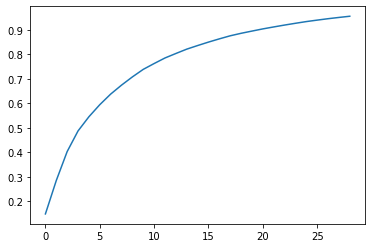

In [48]:
model_pca = PCA(n_components=29)

model_pca.fit(images)

plt.plot(np.cumsum(model_pca.explained_variance_ratio_))
print(np.cumsum(model_pca.explained_variance_ratio_))
plt.show()

In [49]:
# 29 principal components explain almost 95% of variance in the dataset.

###  4. Transform the dataset and fit a logistic regression and observe the accuracy.Compare it with the previous model and comment on the accuracy.

In [51]:
train_x = model_pca.transform(x_train)
test_x = model_pca.transform(x_test)

In [55]:
logistic.fit(train_x, y_train)

predicted_values_1 = logistic.predict(test_x)

print("Variance Ratio\n")
accuracy_score(predicted_values_1, y_test)

Variance Ratio



C:\Users\YZQ8BX\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9361111111111111

In [56]:
# the accuracy with 29 variables is 93.6 % compared to accuracy of 94% with 64 variables. The dimensionality reduction has same
# impact.

### 5. Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label. 

In [57]:
confusion_matrix(y_test,predicted_values_1)

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  1,  0,  0,  1,  0,  1,  2],
       [ 0,  1, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  0,  3,  1],
       [ 0,  1,  0,  0,  1, 40,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  2,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  1,  1, 25]], dtype=int64)